# Trabajo Práctico 3: HISTOGRAMAS, KERNELS & MÉTODOS NO SUPERVISADOS USANDO LA EPH.
# Grupo 2 - Región GBA.
## 

In [90]:
import ISLP
from ISLP import load_data
from statsmodels.datasets import get_rdataset


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [92]:
import pandas as pd

#traemos el archivo de 2004 que será df1
df1 = pd.read_stata(r"usu_individual_T104.dta") 
df1.head()

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


In [94]:
# Filtramos por región igual a 'Gran Buenos Aires'
df1_gba = df1[df1['region'] == 'Gran Buenos Aires']

# Vemos las primeras filas del nuevo DataFrame filtrado
df1_gba.head()

,CODUSU,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,deccfr,ideccfr,rdeccfr,gdeccfr,pdeccfr,adeccfr,pj1_1,pj2_1,pj3_1,idimpp
0,125098,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1299.0,...,07,,06,06,,04,0.0,0.0,0.0,00000
1,125397,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,2018.0,...,00,,00,00,,00,0.0,0.0,0.0,00000
2,125515,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1486.0,...,07,,07,07,,05,0.0,0.0,0.0,00020
3,125558,1.0,1.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000
4,125558,1.0,2.0,Sí,2004.0,1er. Trimestre,Gran Buenos Aires,S,Ciudad de Buenos Aires,1674.0,...,08,,08,08,,06,0.0,0.0,0.0,00000


In [96]:
#traemos el archivo de 2024 que será df2
df2 = pd.read_excel(r"usu_individual_T124.xlsx")

df2

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
0,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,3,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
1,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,4,1,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
2,TQRMNOPUTHLMKQCDEGGFB00852588,2024,1,1,5,0,42,S,10,439,...,NaN,12,0.0,12,12.0,12,12.0,NaN,12,0
3,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,1,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
4,TQRMNOPPWHLLKRCDEGGFB00852574,2024,1,1,2,1,42,S,10,675,...,NaN,8,212500.0,6,6.0,6,6.0,NaN,6,1610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46045,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,1,1,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46046,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,2,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46047,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,3,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
46048,TQRMNOPUQHKMKNCDEIJAH00861661,2024,1,1,4,2,1,S,33,3410,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [33]:
# Filtramos por región igual a 'Gran Buenos Aires'
df2_gba = df2[df2['REGION'] == 1]

# Vemos las primeras filas del nuevo DataFrame filtrado
df2_gba.head()

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,COMPONENTE,H15,REGION,MAS_500,AGLOMERADO,PONDERA,...,PDECIFR,ADECIFR,IPCF,DECCFR,IDECCFR,RDECCFR,GDECCFR,PDECCFR,ADECCFR,PONDIH
245,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,1,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
246,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,2,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
247,TQRMNOSUWHLKMUCDEIJAH00855260,2024,1,1,3,1,1,S,33,1810,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0
255,TQSMNORWVHLLKQCDEIJAH00856914,2024,1,1,1,1,1,S,33,2368,...,NaN,6,500000.0,9,NaN,9,9.0,NaN,9,3324
256,TQRMNOPQQHLOLRCDEIJAH00855133,2024,1,1,1,1,1,S,33,1223,...,NaN,12,0.0,12,NaN,12,12.0,NaN,12,0


In [35]:
#Ya que queremos unir los df, tenemos que hacer que se lean igual, asi que ponemos todos los nombres de categorias en minúsculas
df1_gba.columns = df1_gba.columns.str.lower()
df2_gba.columns = df2_gba.columns.str.lower()
df2_gba.columns

Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih'],
      dtype='object', length=177)

In [37]:
df2_gba.columns

Index(['codusu', 'ano4', 'trimestre', 'nro_hogar', 'componente', 'h15',
       'region', 'mas_500', 'aglomerado', 'pondera',
       ...
       'pdecifr', 'adecifr', 'ipcf', 'deccfr', 'ideccfr', 'rdeccfr', 'gdeccfr',
       'pdeccfr', 'adeccfr', 'pondih'],
      dtype='object', length=177)

In [45]:
# ch03: Parentesco
df2_gba['ch03'] = df2_gba['ch03'].replace({
    1: 'Jefe/a',
    2: 'Cónyuge/pareja',
    3: 'Hijo / hijastro/a',
    4: 'Yerno / nuera',
    5: 'Nieto/a',
    6: 'Madre / padre',
    7: 'Suegro/a',
    8: 'Hermano/a',
    9: 'Otros familiares',
    10: 'No familiares'
})

# ch04: Sexo
df2_gba['ch04'] = df2_gba['ch04'].replace({
    1: 'Varón',
    2: 'Mujer'
})

# ch10: Asistencia escolar
df2_gba['ch10'] = df2_gba['ch10'].replace({
    1: 'Sí, asiste',
    2: 'No asiste, pero asistió',
    3: 'Nunca asistió'
})

# ch12: Nivel educativo
df2_gba['ch12'] = df2_gba['ch12'].replace({
    1: 'Jardín/preescolar',
    2: 'Primario',
    3: 'EGB',
    4: 'Secundario',
    5: 'Polimodal',
    6: 'Terciario',
    7: 'Universitario',
    8: 'Posgrado universitario',
    9: 'Educación especial (discapacitado)'
})

# ch13: Alfabetización
df2_gba['ch13'] = df2_gba['ch13'].replace({
    1: 'Sí',
    2: 'No',
    3: 'Ns/Nr'
})

# ch14: Año o grado
df2_gba['ch14'] = df2_gba['ch14'].replace({
    0: 'Ninguno',
    1: 'Primero',
    2: 'Segundo',
    3: 'Tercero',
    4: 'Cuarto',
    5: 'Quinto',
    6: 'Sexto',
    7: 'Séptimo',
    8: 'Octavo',
    9: 'Noveno',
    98: 'Educación especial',
    99: 'Ns/Nr'
})

C:\Users\martz\AppData\Local\Temp\ipykernel_21832\4219386038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['ch03'] = df2_gba['ch03'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_21832\4219386038.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['ch04'] = df2_gba['ch04'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_21832\4219386038.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [47]:
# estado: Condición de actividad
df2_gba['estado'] = df2_gba['estado'].replace({
    0: 'Entrevista individual no realizada (no respuesta al cuestionario individual)',
    1: 'Ocupado',
    2: 'Desocupado',
    3: 'Inactivo',
    4: 'Menor de 10 años'
})

# cat_ocup: Categoría ocupacional
df2_gba['cat_ocup'] = df2_gba['cat_ocup'].replace({
    1: 'Patrón',
    2: 'Cuenta propia',
    3: 'Obrero o empleado',
    4: 'Trabajador familiar sin remuneración',
    9: 'Ns/Nr'
})

# cat_inac: Razón de inactividad
df2_gba['cat_inac'] = df2_gba['cat_inac'].replace({
    1: 'Jubilado / Pensionado',
    2: 'Rentista',
    3: 'Estudiante',
    4: 'Ama de casa',
    5: 'Menor de 6 años',
    6: 'Discapacitado',
    7: 'Otros'
})

# pp04a: Sector de actividad del establecimiento
df2_gba['pp04a'] = df2_gba['pp04a'].replace({
    1: '...estatal?',
    2: '... privada?',
    3: '... de otro tipo? (especificar)'
})

C:\Users\martz\AppData\Local\Temp\ipykernel_21832\117438608.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['estado'] = df2_gba['estado'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_21832\117438608.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['cat_ocup'] = df2_gba['cat_ocup'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_21832\117438608.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [49]:
# pp07i: Respuesta Sí/No
df2_gba['pp07i'] = df2_gba['pp07i'].replace({
    1: 'Sí',
    2: 'No'
})

# pp10a: Tiempo de búsqueda de trabajo
df2_gba['pp10a'] = df2_gba['pp10a'].replace({
    1: '...menos de 1 mes',
    2: '...de 1 a 3 meses',
    3: '...más de 3 a 6 meses',
    4: '...más de 6 a 12 meses',
    5: '...más de 1 año'
})

#  pp10e: Tiempo de búsqueda de empleo (otra variable similar)
df2_gba['pp10e'] = df2_gba['pp10e'].replace({
    1: '...menos de 1 mes?',
    2: '...de 1 a 3 meses?',
    3: '...más de 3 a 6 meses?',
    4: '...más de 6 a 12 meses?',
    5: '...más de 1 a 3 años?',
    6: '...más de 3 años?'
})

#  pp11s: Tipo de establecimiento
df2_gba['pp11s'] = df2_gba['pp11s'].replace({
    1: '...estatal?',
    2: '...privada?',
    3: '...de otro tipo?'
})

C:\Users\martz\AppData\Local\Temp\ipykernel_21832\895345839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['pp07i'] = df2_gba['pp07i'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_21832\895345839.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_gba['pp10a'] = df2_gba['pp10a'].replace({
C:\Users\martz\AppData\Local\Temp\ipykernel_21832\895345839.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [51]:
# Seleccionamos solo las columnas que queremos de ambas bases de datos
columns_to_keep = ['ano4', 'mas_500', 'ch03', 'ch04', 'ch06', 'ch10', 'ch12', 
                   'ch13', 'ch14', 'estado', 'cat_ocup', 'cat_inac', 'pp04a', 
                   'pp07i', 'pp08d1', 'pp10a', 'pp10e', 'pp11s', 'p47t', 'p21', 'pp3e_tot', 'pp3f_tot']

# Aseguramos que ambas bases tengan solo las columnas necesarias
df1_filtered = df1_gba[columns_to_keep]
df2_filtered = df2_gba[columns_to_keep]

# Unimos los DataFrames
df_final = pd.concat([df1_filtered, df2_filtered], ignore_index=True)

# Verificamos las primeras filas de df_final
df_final

,ano4,mas_500,ch03,ch04,ch06,ch10,ch12,ch13,ch14,estado,...,pp04a,pp07i,pp08d1,pp10a,pp10e,pp11s,p47t,p21,pp3e_tot,pp3f_tot
0,2004.0,S,Jefe,Varón,79.0,"No asiste, pero asistió",Secundario,No,03,Inactivo,...,0.0,0.0,0.0,0.0,0.0,0.0,368.0,0.0,0.0,0.0
1,2004.0,S,Jefe,Mujer,67.0,"No asiste, pero asistió",Primario,Sí,,Ocupado,...,...privada?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2004.0,S,Jefe,Mujer,74.0,"No asiste, pero asistió",Primario,Sí,,Inactivo,...,0.0,0.0,0.0,0.0,0.0,0.0,440.0,0.0,0.0,0.0
3,2004.0,S,Jefe,Varón,54.0,"No asiste, pero asistió",Primario,Sí,,Ocupado,...,...privada?,0.0,0.0,0.0,0.0,0.0,2000.0,2000.0,59.0,0.0
4,2004.0,S,Cónyuge/Pareja,Mujer,51.0,"No asiste, pero asistió",Universitario,Sí,,Inactivo,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14693,2024.0,S,Jefe/a,Mujer,43,"No asiste, pero asistió",Secundario,No,Ninguno,Ocupado,...,... privada?,0.0,250000.0,NaN,NaN,NaN,-9.0,250000.0,0.0,0.0
14694,2024.0,S,Hijo / hijastro/a,Varón,21,"Sí, asiste",Secundario,No,Segundo,Entrevista individual no realizada (no respues...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
14695,2024.0,S,Hijo / hijastro/a,Varón,20,"Sí, asiste",Secundario,No,Tercero,Entrevista individual no realizada (no respues...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
14696,2024.0,S,Hijo / hijastro/a,Varón,11,"Sí, asiste",Secundario,No,Ninguno,Entrevista individual no realizada (no respues...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


## Parte I
### Ejercicio 1

In [53]:
df_final['ch06'] = pd.to_numeric(df_final['ch06'], errors='coerce')
df_final['edad2'] = df_final['ch06'] ** 2
df_final['edad2']

0        6241.0
1        4489.0
2        5476.0
3        2916.0
4        2601.0
          ...  
14693    1849.0
14694     441.0
14695     400.0
14696     121.0
14697     576.0
Name: edad2, Length: 14698, dtype: float64

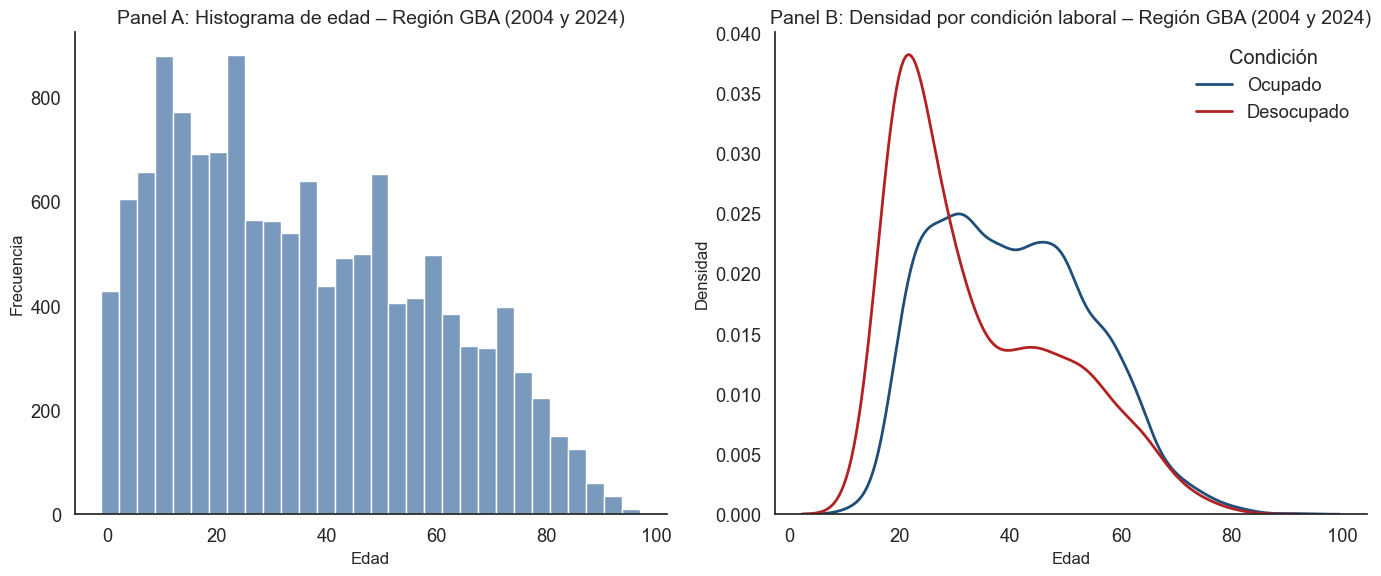

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Aseguramos de que ch06 sea numérica
df_final['ch06'] = pd.to_numeric(df_final['ch06'], errors='coerce')

sns.set(style="white", font_scale=1.2)

# Paleta de colores 
color_ocupado = "#1f4e79"   
color_desocupado = "#b22222"  
color_hist = "#4e79a7"      

# Crear figura con 1 fila y 2 columnas (Panel A y B)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel A: Histograma de edad
sns.histplot(
    df_final['ch06'], 
    bins=30, 
    kde=False, 
    color=color_hist, 
    edgecolor='white', 
    ax=axes[0]
)
axes[0].set_title("Panel A: Histograma de edad – Región GBA (2004 y 2024)", fontsize=14)
axes[0].set_xlabel("Edad", fontsize=12)
axes[0].set_ylabel("Frecuencia", fontsize=12)

# Panel B: Densidades kernel para ocupados y desocupados
sns.kdeplot(
    data=df_final[df_final['estado'] == 'Ocupado'],
    x='ch06', label='Ocupado', fill=False, color=color_ocupado, linewidth=2, ax=axes[1]
)
sns.kdeplot(
    data=df_final[df_final['estado'] == 'Desocupado'],
    x='ch06', label='Desocupado', fill=False, color=color_desocupado, linewidth=2, ax=axes[1]
)
axes[1].set_title("Panel B: Densidad por condición laboral – Región GBA (2004 y 2024)", fontsize=14)
axes[1].set_xlabel("Edad", fontsize=12)
axes[1].set_ylabel("Densidad", fontsize=12)
axes[1].legend(title="Condición", frameon=False)

# Eliminamos bordes para un estilo más limpio
for ax in axes:
    sns.despine(ax=ax)

plt.tight_layout()
plt.show()

### En el panel A, se observa un histograma que refleja la distribución de edades, con un pico pronunciado alrededor de los 20 años y una disminución gradual a medida que aumenta la edad. Esto sugiere que la mayoría de las observaciones se concentran en los grupos etarios más jóvenes. 

### Por otro lado, el panel B muestra la densidad de la variable edad, diferenciada por condición laboral. La línea azul representa a los ocupados, con un pico en torno a los 30-40 años, mientras que la línea roja, correspondiente a los desocupados, presenta un pico más marcado alrededor de los 20 años. Esto indica que los individuos desocupados tienden a ser más jóvenes en comparación con aquellos que se encuentran ocupados.

### Ejercicio 2

In [99]:
import numpy as np

# Diccionario base: años de educación si el nivel está COMPLETO
educacion_completa = {
    "Jardín/preescolar": 0,
    "Primario": 7,
    "EGB": 7,
    "Secundario": 13,       # 7 (primaria) + 6 (secundaria)
    "Polimodal": 13,        # Igual que secundario
    "Terciario": 16,        # 13 + 3
    "Universitario": 18,    # 13 + 5
    "Posgrado universitario": 20,  # 18 + 2
    "Educación especial (discapacitado)": np.nan
}

# Diccionario de ch14 → cantidad de años aprobados (solo si no finalizó el nivel)
anios_aprobados = {
    "Ninguno": 0,
    "Primero": 1,
    "Segundo": 2,
    "Tercero": 3,
    "Cuarto": 4,
    "Quinto": 5,
    "Sexto": 6,
    "Séptimo": 7,
    "Octavo": 8,
    "Noveno": 9,
    "Educación especial": np.nan,
    "Ns/Nr": np.nan
}

# Función para calcular educ para cada fila
def calcular_educ(row):
    nivel = row['ch12']
    finalizo = row['ch13']
    ultimo_anio = row['ch14']
    
    if nivel not in educacion_completa:
        return np.nan
    
    if finalizo == "Sí":
        return educacion_completa[nivel]
    else:
        # Asume que no finalizó, por lo tanto, sumamos a la base previa
        if nivel in ["Primario", "EGB"]:
            base = 0
        elif nivel in ["Secundario", "Polimodal"]:
            base = 7
        elif nivel == "Terciario":
            base = 13
        elif nivel == "Universitario":
            base = 13
        elif nivel == "Posgrado universitario":
            base = 18
        else:
            base = 0

        return base + anios_aprobados.get(ultimo_anio, np.nan)

# Crear la nueva variable
df_final['educ'] = df_final.apply(calcular_educ, axis=1)


C:\Users\martz\AppData\Local\Temp\ipykernel_21832\407113539.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['educ'] = df_final.apply(calcular_educ, axis=1)


In [101]:
# Calcular estadísticas descriptivas
stats = {
    "Promedio": df_final['educ'].mean(),
    "Desvío estándar": df_final['educ'].std(),
    "Mínimo": df_final['educ'].min(),
    "Mediana (P50)": df_final['educ'].median(),
    "Máximo": df_final['educ'].max()
}

# Mostrar en formato ordenado
import pandas as pd
stats_df = pd.DataFrame(stats, index=["Educación (años)"]).T
stats_df

,Educación (años)
Promedio,10.739034
Desvío estándar,4.716554
Mínimo,0.000000
Mediana (P50),13.000000
Máximo,21.000000


#### En la base de datos, el promedio de años de educación es de aproximadamente 10,98 años. Esto sugiere que, en su mayoría, las personas tienen un nivel educativo entre secundario incompleto o completo. El desvío estándar es de 4,69 años, lo que indica una gran heterogeneidad en los niveles educativos: algunos tienen más años de educación que el promedio, mientras que otros tienen menos.

#### El valor mínimo es 0, lo que refleja que algunas personas no han recibido educación formal, posiblemente debido a factores como edad o condiciones socioeconómicas. Por otro lado, la mediana es de 13 años, que es mayor que el promedio, quiere decir que la distribucion tiene una simetria por la izquierda. Lo que significa que la mitad de la población tiene 13 o más años de educación, lo que equivale a secundario completo o algo más. Finalmente, el valor máximo de 23 años indica que hay personas con un alto nivel educativo, como aquellos con posgrados o múltiples carreras universitarias.

## Ejercicio 3


In [61]:
# Primero, ajustamos los ingresos de 2004 a precios de 2024
df_final['p21_ajustado'] = df_final.apply(
    lambda row: row['p21'] * 1031.91 if row['ano4'] == 2004 else row['p21'], # $1 en 2004 equivale a $1,031.91 en 2024
    axis=1
)

# Ahora calculamos el salario semanal suponiendo jornada completa (40 hs semanales)
df_final['salario_semanal'] = df_final['p21_ajustado'] / 40
df_final['salario_semanal'] 

0            0.0
1            0.0
2            0.0
3        51595.5
4            0.0
          ...   
14693     6250.0
14694        0.0
14695        0.0
14696        0.0
14697        0.0
Name: salario_semanal, Length: 14698, dtype: float64

In [63]:
ocupacion_pivot = df_final.pivot_table(index='ano4', columns='estado', aggfunc='size', fill_value=0)
ocupacion_pivot

estado,Desocupado,Entrevista individual no realizada (no respuesta al cuestion,Entrevista individual no realizada (no respuesta al cuestionario individual),Inactivo,Menor de 10 años,Ocupado
ano4,,,,,,
2004.0,528,10,0,2800,1230,3079
2024.0,311,0,41,2662,813,3224


In [65]:
salario_pivot = df_final.pivot_table(
    index='ano4',
    columns='estado',
    values='p21_ajustado',
    aggfunc='mean'
)
salario_pivot

estado,Desocupado,Entrevista individual no realizada (no respuesta al cuestion,Entrevista individual no realizada (no respuesta al cuestionario individual),Inactivo,Menor de 10 años,Ocupado
ano4,,,,,,
2004.0,0.0,0.0,NaN,0.0,0.0,674430.770958
2024.0,0.0,NaN,0.0,0.0,0.0,263355.330645


In [67]:
df_final['salario_semanal'].describe()

count    1.469800e+04
mean     4.976238e+03
std      1.633005e+04
min     -2.250000e-01
25%      0.000000e+00
50%      0.000000e+00
75%      5.159550e+03
max      1.393079e+06
Name: salario_semanal, dtype: float64

In [103]:
# Aca veo que hay un error de salarios negativos, por lo que limpiamos la base de errores
df_final = df_final[df_final['salario_semanal'] >= 0]

In [105]:
# Estilo general
sns.set(style="whitegrid")

# Limpiar datos: Eliminar valores nulos o negativos
df_final_clean = df_final[df_final['salario_semanal'] >= 0].dropna(subset=['salario_semanal'])

# Filtrar datos de salario semanal según el estado (ocupados y desocupados) 
ocupados = df_final_clean[(df_final_clean['estado'] == 'Ocupado')]['p21_ajustado']
desocupados = df_final_clean[(df_final_clean['estado'] == 'Desocupado')]['p21_ajustado']


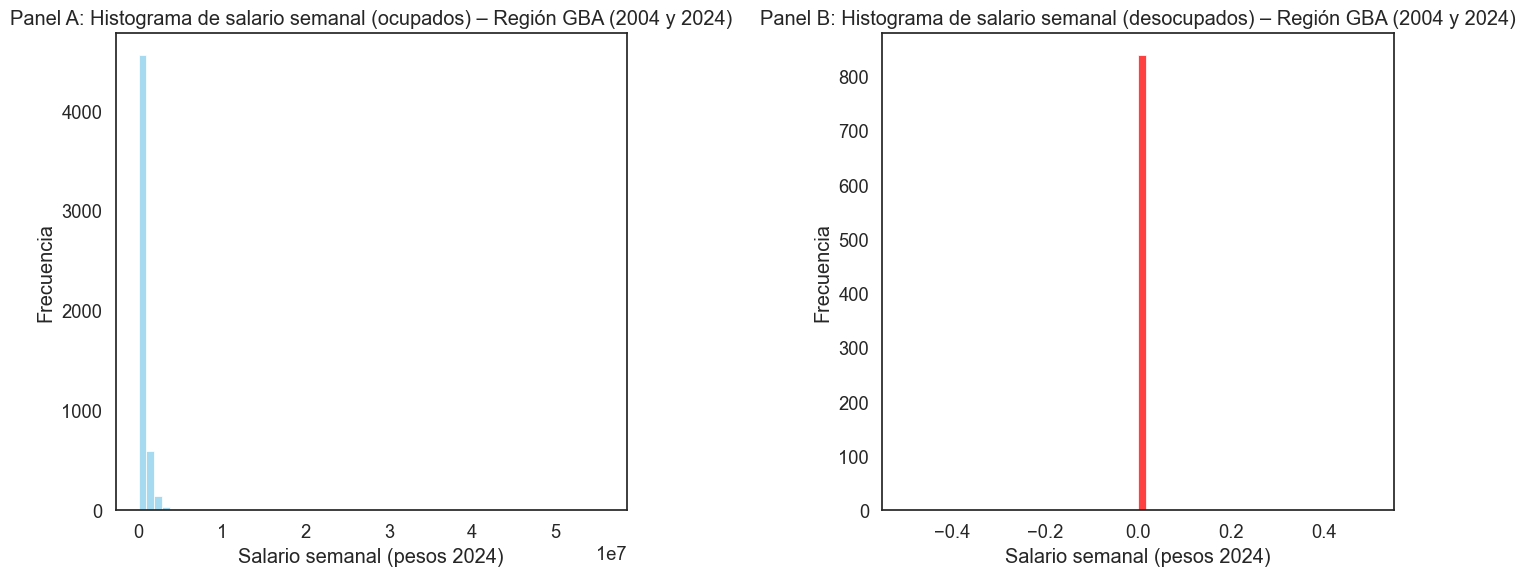

In [152]:
# Comprobar si alguno de los conjuntos está vacío
if ocupados.empty or desocupados.empty:
    print("Uno de los conjuntos de datos está vacío, verifica los filtros de estado.")

# Creamos la figura y los dos paneles
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Panel A: Histograma de salario semanal para ocupados
sns.histplot(ocupados, bins=60, kde=False, color='skyblue', ax=axes[0])

axes[0].set_title('Panel A: Histograma de salario semanal (ocupados) – Región GBA (2004 y 2024)')
axes[0].set_xlabel('Salario semanal (pesos 2024)')
axes[0].set_ylabel('Frecuencia')

# Panel B: Histograma de salario semanal para desocupados
sns.histplot(desocupados, bins=60, kde=False, color='red', ax=axes[1])

axes[1].set_title('Panel B: Histograma de salario semanal (desocupados) – Región GBA (2004 y 2024)')
axes[1].set_xlabel('Salario semanal (pesos 2024)')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.subplots_adjust(wspace=0.5)
plt.show()

#### Los paneles muestran la distribución de salarios semanales para ocupados y desocupados. Vemos que los ocupados tienen mayores salarios que los desocupados, por evidentes razones de percibir un ingreso laboral que es fijo y por varias horas. Esto refleja la precaria situación económica de los desocupados.

## Ejercicio 4

In [77]:
# Creamos la variable 'horastrab' como la suma de 'pp3e_tot' y 'pp3f_tot'
df_final['horastrab'] = df_final['pp3e_tot'] + df_final['pp3f_tot']

# Verificamos las primeras filas para confirmar que la nueva variable fue creada correctamente
df_final[['pp3e_tot', 'pp3f_tot', 'horastrab']].head(20)


C:\Users\martz\AppData\Local\Temp\ipykernel_21832\2182343081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['horastrab'] = df_final['pp3e_tot'] + df_final['pp3f_tot']


,pp3e_tot,pp3f_tot,horastrab
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,59.0,0.0,59.0
4,0.0,0.0,0.0
5,2.0,0.0,2.0
6,6.0,0.0,6.0
7,55.0,0.0,55.0
8,0.0,0.0,0.0
9,0.0,0.0,0.0


In [79]:
# Reemplazar NaN por 0 si es necesario
df_final['pp3e_tot'] = df_final['pp3e_tot'].fillna(0)
df_final['pp3f_tot'] = df_final['pp3f_tot'].fillna(0)

# Creamos la variable 'horastrab' como la suma de 'pp3e_tot' y 'pp3f_tot'
df_final['horastrab'] = df_final['pp3e_tot'] + df_final['pp3f_tot']

# Verificamos las primeras filas para confirmar que la nueva variable fue creada correctamente
print(df_final[['pp3e_tot', 'pp3f_tot', 'horastrab']].head(20))



    pp3e_tot  pp3f_tot  horastrab
0        0.0       0.0        0.0
1        0.0       0.0        0.0
2        0.0       0.0        0.0
3       59.0       0.0       59.0
4        0.0       0.0        0.0
5        2.0       0.0        2.0
6        6.0       0.0        6.0
7       55.0       0.0       55.0
8        0.0       0.0        0.0
9        0.0       0.0        0.0
10       0.0       0.0        0.0
11      10.0       0.0       10.0
12      40.0       0.0       40.0
13       9.0       0.0        9.0
14       0.0       0.0        0.0
15       0.0       0.0        0.0
16       0.0       0.0        0.0
17       0.0       0.0        0.0
18      63.0       0.0       63.0
19       0.0       0.0        0.0


C:\Users\martz\AppData\Local\Temp\ipykernel_21832\1718715282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pp3e_tot'] = df_final['pp3e_tot'].fillna(0)
C:\Users\martz\AppData\Local\Temp\ipykernel_21832\1718715282.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['pp3f_tot'] = df_final['pp3f_tot'].fillna(0)
C:\Users\martz\AppData\Local\Temp\ipykernel_21832\1718715282.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [81]:
# Calculamos estadísticas descriptivas para la columna 'horastrab'
estadisticas = df_final['horastrab'].describe()

# Extraemos valores específicos
promedio = estadisticas['mean']
desviacion_estandar = estadisticas['std']
minimo = estadisticas['min']
percentil_50 = estadisticas['50%']
maximo = estadisticas['max']

# Mostramos resultados
print(f"Promedio: {promedio}")
print(f"Desviación estándar: {desviacion_estandar}")
print(f"Mínimo: {minimo}")
print(f"Percentil 50 (Mediana): {percentil_50}")
print(f"Máximo: {maximo}")

Promedio: 16.198734729493893
Desviación estándar: 50.78792586974127
Mínimo: 0.0
Percentil 50 (Mediana): 0.0
Máximo: 1047.0


### En cuanto a las estadísticas de las horas trabajadas, se observa que el promedio es bajo (16.2 horas), lo que podría indicar que una gran parte de los individuos en la muestra trabaja pocas horas o no trabajan en absoluto. Esto se ve reflejado en la mediana (0 horas), lo que sugiere que la mitad de los casos no reportan actividad laboral, sea porque no trabajan o no quieren decir cuanto.

### La desviación estándar es elevada (50.8), lo que denota una alta dispersión en las horas trabajadas, con algunos casos extremos de trabajadores que han registrado hasta 1047 horas, lo que podría ser un error en los datos o situaciones excepcionales como trabajos extraordinarios.

### Este patrón podría indicar una segmentación en el mercado laboral, con una gran proporción de trabajadores a tiempo parcial o inactivos y algunos pocos con una carga laboral mucho mayor. Esto podría ser relevante al analizar la informalidad laboral o las condiciones de empleo en el contexto estudiado.

## Ejercicio 5

In [83]:
df_final.estado[df_final.ano4==2024].shape[0]


6105

In [85]:
df_final.estado[df_final.ano4==2004].shape[0]

7647

In [87]:
# Filtrar por los años 2004 y 2024
df_2004 = df_final[df_final['ano4'] == 2004]
df_2024 = df_final[df_final['ano4'] == 2024]

# Calcular la cantidad de observaciones
cantidad_observaciones_2004 = len(df_2004)
cantidad_observaciones_2024 = len(df_2024)
cantidad_observaciones_total = len(df_final)

# Calcular la cantidad de observaciones con NaN en la variable 'estado'
cantidad_nas_estado_2004 = df_2004['estado'].isna().sum()
cantidad_nas_estado_2024 = df_2024['estado'].isna().sum()
cantidad_nas_estado_total = df_final['estado'].isna().sum()

# Calcular la cantidad de ocupados y desocupados
cantidad_ocupados_2004 = df_2004[df_2004['estado'] == 'Ocupado'].shape[0]
cantidad_ocupados_2024 = df_2024[df_2024['estado'] == 'Ocupado'].shape[0]
cantidad_ocupados_total = df_final[df_final['estado'] == 'Ocupado'].shape[0]

cantidad_desocupados_2004 = df_2004[df_2004['estado'] == 'Desocupado'].shape[0]
cantidad_desocupados_2024 = df_2024[df_2024['estado'] == 'Desocupado'].shape[0]
cantidad_desocupados_total = df_final[df_final['estado'] == 'Desocupado'].shape[0]

# Calcular la cantidad de variables limpias y homogeneizadas (sin NaN en columnas)
cantidad_limpias_2004 = df_2004.dropna(axis=1, how='any').shape[1]  # Número de columnas sin NaN
cantidad_limpias_2024 = df_2024.dropna(axis=1, how='any').shape[1]
cantidad_limpias_total = df_final.dropna(axis=1, how='any').shape[1]

# Crear la tabla con los resultados
tabla = {
    "2004": [
        cantidad_observaciones_2004,
        cantidad_nas_estado_2004,
        cantidad_ocupados_2004,
        cantidad_desocupados_2004,
        cantidad_limpias_2004
    ],
    "2024": [
        cantidad_observaciones_2024,
        cantidad_nas_estado_2024,
        cantidad_ocupados_2024,
        cantidad_desocupados_2024,
        cantidad_limpias_2024
    ],
    "Total": [
        cantidad_observaciones_total,
        cantidad_nas_estado_total,
        cantidad_ocupados_total,
        cantidad_desocupados_total,
        cantidad_limpias_total
    ]
}

# Convertir a DataFrame para visualizar mejor
tabla_df = pd.DataFrame(tabla, index=[
    "Cantidad observaciones",
    "Cantidad de observaciones con Nas en la variable “Estado”",
    "Cantidad de Ocupados",
    "Cantidad de Desocupados",
    "Cantidad de variables limpias y homogeneizadas"
])

# Mostrar la tabla
tabla_df

,2004,2024,Total
Cantidad observaciones,7647,6105,13752
Cantidad de observaciones con Nas en la variable “Estado”,0,0,0
Cantidad de Ocupados,3079,2278,5357
Cantidad de Desocupados,528,311,839
Cantidad de variables limpias y homogeneizadas,24,18,16


### En el trabajo práctico realizado, se observa que la muestra total consta de 13.752 observaciones, distribuidas en 7.647 correspondientes al año 2004 y 6.105 al año 2024. Cabe destacar que no se registraron valores faltantes (NAs) en la variable "Estado". 

### Respecto a la condición laboral, se contabilizaron 5.357 ocupados y 839 desocupados en el total de la muestra. Al analizar la evolución entre los dos años, se aprecia una disminución tanto en la cantidad de ocupados como de desocupados. 

### Por último, se indica que se han limpiado y homogeneizado 24 variables para el año 2004 y 18 variables para el 2024, finalizando con 16 variables comunes a ambos períodos.

### Parte II: Métodos No Supervisados

In [1]:
# Importamos librerías necesarias
import pandas as pd
import numpy as np

# Usamos y cargamos la base unificada del TP2 (ya está filtrada por GBA)
df = pd.read_excel("baseGBA_unida.xlsx")

# Creamos las variables de edad y edad² 
df["edad"] = pd.to_numeric(df["CH06"], errors="coerce")
df["edad2"] = df["edad"] ** 2

# Creamos la variable de educ (años de educación)
def calcular_educacion(row):
    nivel = row["CH12"]
    finalizo = row["CH13"]
    ultimo = row["CH14"]

    if pd.isnull(nivel):
        return np.nan
    if finalizo == 1:
        if nivel == 1:  
            return 7
        elif nivel == 2:  
            return 12
        elif nivel == 3:  
            return 17
    if pd.notnull(ultimo):
        try:
            return int(ultimo)
        except:
            return np.nan
    return np.nan

df["educ"] = df.apply(calcular_educacion, axis=1)

# Creamos la variable de salario_semanal ajustando los ingresos de 2004 a valores de 2024
df["P47T"] = pd.to_numeric(df["P47T"], errors="coerce")
df["ingresos_ajustados"] = df.apply(lambda x: x["P47T"] * 25 if x["ANO4"] == 2004 else x["P47T"], axis=1) # 25 aproximadamente porque lo queremos llevar a precios constantes para hacer la comparación
df["salario_semanal"] = df["ingresos_ajustados"] / 4  

# Creamos la variable de horastrab sumando horas principales y secundarias
df["PP3E_TOT"] = pd.to_numeric(df["PP3E_TOT"], errors="coerce")
df["PP3F_TOT"] = pd.to_numeric(df.get("PP3F_TOT", 0), errors="coerce") 
df["horastrab"] = df[["PP3E_TOT", "PP3F_TOT"]].sum(axis=1)

# Nos quedamos solo con las variables necesarias
variables_finales = ["ANO4", "edad", "edad2", "educ", "salario_semanal", "horastrab"]
df_final = df[variables_finales].dropna()

# Guardamos la nueva base simplificada
df_final.to_excel("base_TP3_parte2.xlsx", index=False)

In [2]:
# Importamos las librerías que vamos a usar
import pandas as pd

# Cargamos la base simplificada
df = pd.read_excel("base_TP3_parte2.xlsx")

# Hacemos una copia para trabajar sobre ella
df_filtrada = df.copy()

# Filtramos registros con educ > 30 (esto porque son años de educación no posibles generalmente)
df_filtrada = df_filtrada[df_filtrada["educ"] <= 30]

# Filtramos registros con salario_semanal negativo (esto porque no tiene sentido que sea -0)
df_filtrada = df_filtrada[df_filtrada["salario_semanal"] >= 0]

# Filtramos registros con horastrab > 120 (esto porque no es posible generalmente que sea más de 120)
df_filtrada = df_filtrada[df_filtrada["horastrab"] <= 120]

# Guardamos la nueva base final filtrada
df_filtrada.to_excel("base_TP3_limpia_definitiva.xlsx", index=False)

# Mostramos la cantidad de observaciones por año luego del filtrado
print("Observaciones por año luego del filtrado:")
print(df_filtrada["ANO4"].value_counts())

Observaciones por año luego del filtrado:
ANO4
2004    3764
2024    3444
Name: count, dtype: int64


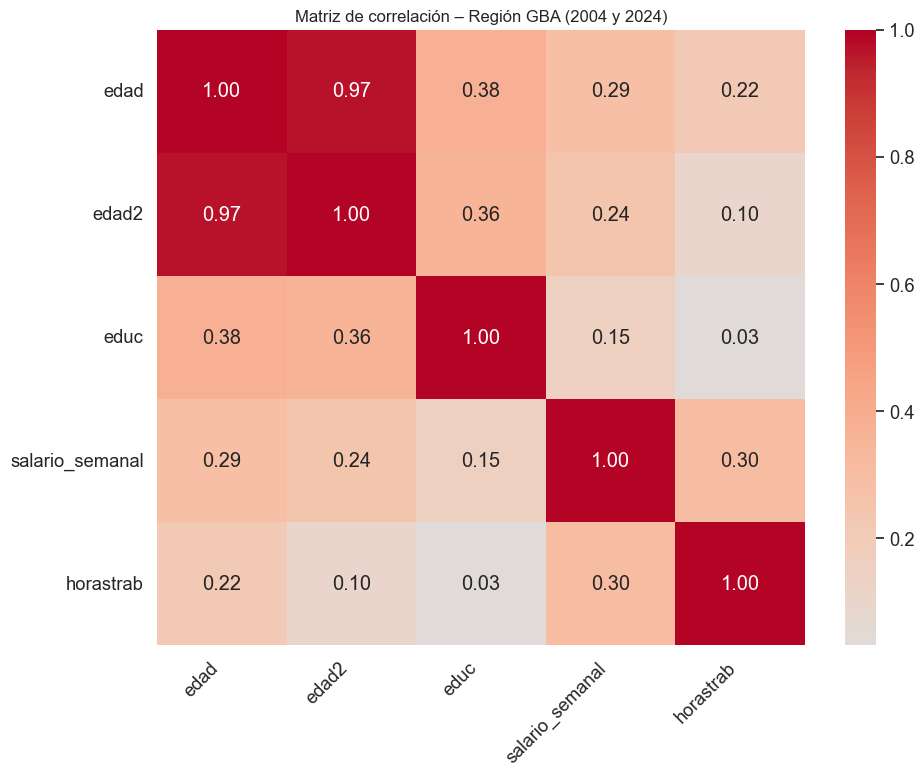

Matriz de correlación (toda la base)
                     edad     edad2      educ  salario_semanal  horastrab
edad             1.000000  0.966737  0.379037         0.288057   0.219673
edad2            0.966737  1.000000  0.359134         0.243048   0.098081
educ             0.379037  0.359134  1.000000         0.151083   0.030817
salario_semanal  0.288057  0.243048  0.151083         1.000000   0.304192
horastrab        0.219673  0.098081  0.030817         0.304192   1.000000


In [121]:
# Importamos las librerías que vamos a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el archivo con la base final unificada y filtrada
df = pd.read_excel("base_TP3_limpia_definitiva.xlsx") 

# Seleccionamos las variables pedidas en la consigna para la matriz de correlación
variables = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab']
df_filtered = df[variables].copy()

# Calculamos la matriz de correlación entre las cinco variables sobre la base de 2004 y 2024
corr_total = df_filtered.corr()

# Graficamos la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_total, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Matriz de correlación – Región GBA (2004 y 2024)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Mostramos también la matriz
print("Matriz de correlación (toda la base)")
print(corr_total)

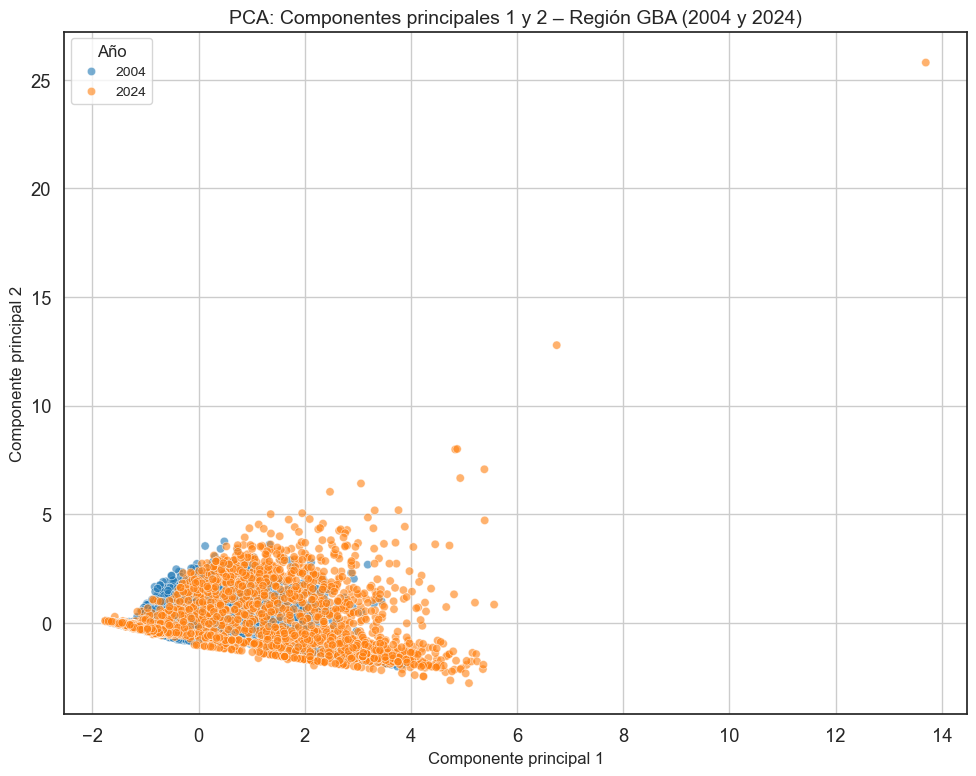

Varianza explicada por los componentes
[0.47705228 0.2283202 ]


In [122]:
# Importamos las librerías que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Leemos la base ya limpia con las variables filtradas y estandarizadas
df = pd.read_excel("base_TP3_limpia_definitiva.xlsx")

# Seleccionamos las variables numéricas pedidas en la consigna
variables = ["edad", "edad2", "educ", "salario_semanal", "horastrab"]
X = df[variables].copy()

# Estandarizamos las variables para que estén en la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos PCA para reducir las 5 variables originales a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Creamos un nuevo DataFrame con los scores
df_pca = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
df_pca["ANO4"] = df["ANO4"].values

# Graficamos los componentes principales en un gráfico de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="ANO4", palette="tab10", alpha=0.6)
plt.title("PCA: Componentes principales 1 y 2 – Región GBA (2004 y 2024)", fontsize=14)
plt.xlabel("Componente principal 1", fontsize=12)
plt.ylabel("Componente principal 2", fontsize=12)
plt.legend(title="Año", title_fontsize=12, fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostramos cuánta varianza explica cada uno de los componente
print("Varianza explicada por los componentes")
print(pca.explained_variance_ratio_)

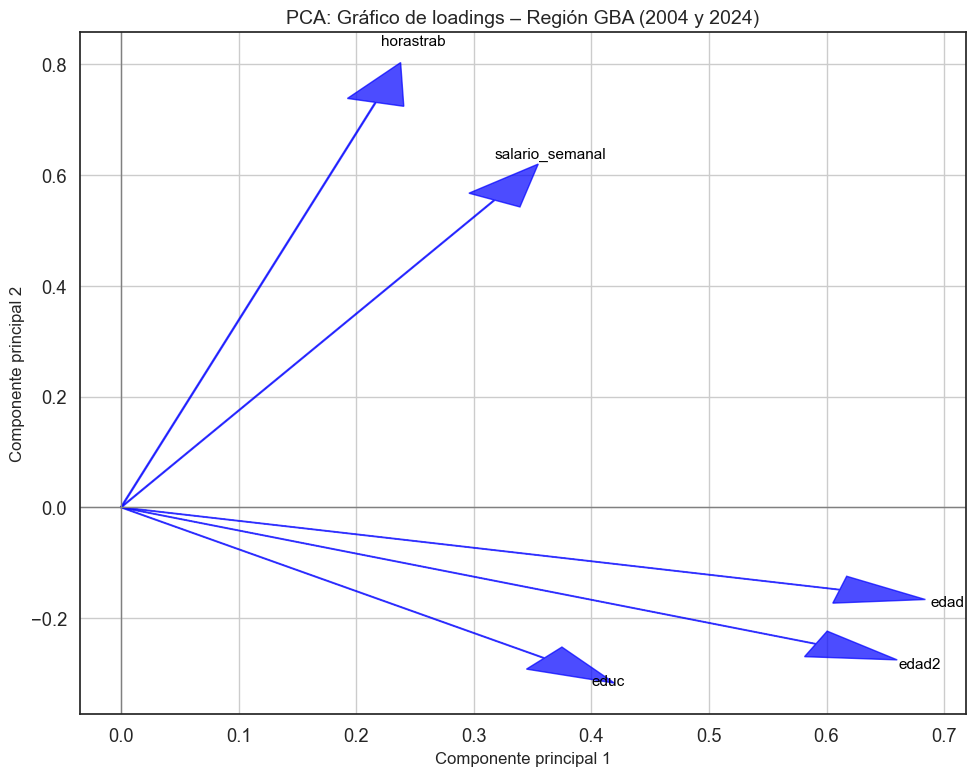

Cargas de cada variable sobre los componentes:
                      PC1       PC2
edad             0.611219 -0.148718
edad2            0.590904 -0.246607
educ             0.359888 -0.272237
salario_semanal  0.317569  0.554964
horastrab        0.216506  0.731416


In [123]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Cargamos el archivo con la base final unificada y filtrada
df = pd.read_excel("base_TP3_limpia_definitiva.xlsx")

# Seleccionamos las variables numéricas a usar en el PCA
variables = ["edad", "edad2", "educ", "salario_semanal", "horastrab"]
X = df[variables].copy()

# Estandarizamos las variables para que estén en la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicamos PCA para reducir las 5 variables originales a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Obtenemos los loadings del PCA
loadings = pca.components_.T
var_names = variables

# Creamos el gráfico de flechas para visualizar los loadings
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Dibujamos una flecha por cada variable en el espacio de los componentes
for i, var in enumerate(var_names):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='blue', alpha=0.7, head_width=0.05)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, var,
             color='black', ha='center', va='center', fontsize=11)

# Etiquetamos los ejes y el gráfico
plt.title("PCA: Gráfico de loadings – Región GBA (2004 y 2024)", fontsize=14)
plt.xlabel("Componente principal 1", fontsize=12)
plt.ylabel("Componente principal 2", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostramos la tabla con los valores numéricos de los loadings
loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2"], index=var_names)
print("Cargas de cada variable sobre los componentes:")
print(loadings_df)

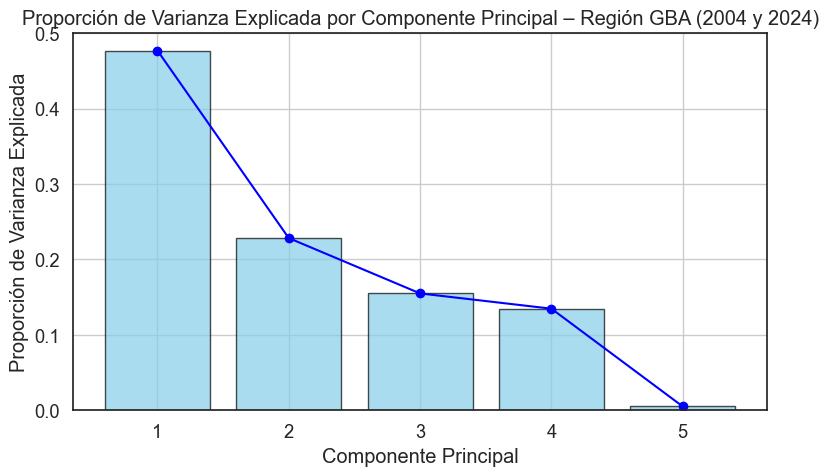

Componente 1: 0.4771
Componente 2: 0.2283
Componente 3: 0.1549
Componente 4: 0.1347
Componente 5: 0.0050


In [130]:
#Importamos las librerías.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#Seleccionamos las variables numéricas relevantes.
variables = ['edad', 'edad2', 'educ', 'salario_semanal', 'horastrab', 'ANO4']
X = df[variables].dropna()

#Extraemos los años únicos.
anios = sorted(X['ANO4'].unique())
anios_texto = ', '.join(map(str, anios))

#Quitamos 'ANO4' para PCA para evitar errores.
X_numeric = X.drop(columns='ANO4')

#Estandarizamos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

#Aplicamos PCA.
pca = PCA()
pca.fit(X_scaled)

# Obtenemos la proporción de varianza explicada.
explained_var_ratio = pca.explained_variance_ratio_

#Graficamos.
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_var_ratio)+1), explained_var_ratio, alpha=0.7, color='skyblue', edgecolor='black')
plt.plot(range(1, len(explained_var_ratio)+1), explained_var_ratio, marker='o', color='blue')
plt.xlabel('Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.title(f'Proporción de Varianza Explicada por Componente Principal – Región GBA (2004 y 2024)')
plt.xticks(range(1, len(explained_var_ratio)+1))
plt.grid(True)
plt.tight_layout()
plt.show()

#Imprimimos los valores.
for i, var in enumerate(explained_var_ratio, start=1):
    print(f"Componente {i}: {var:.4f}")


### B Cluster

#### 5:Cluster k-medias¶

##### A-)

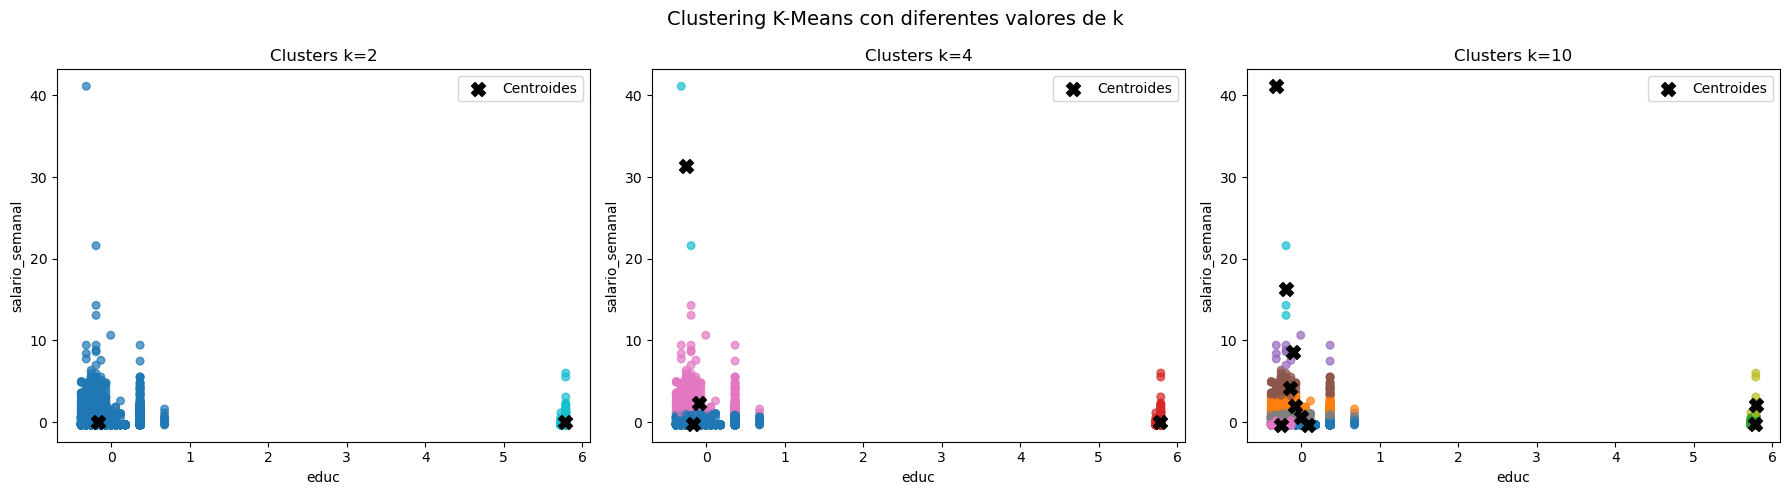

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionamos dos variables para graficar los clusters (podés cambiar estas si querés)
features = ['educ', 'salario_semanal']
X = df[features].dropna()

# Estandarizamos las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Definimos los valores de k
k_values = [2, 4, 10]

# Graficamos los clusters para cada k
plt.figure(figsize=(18, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    plt.subplot(1, 3, i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='tab10', s=30, alpha=0.7)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                color='black', marker='X', s=100, label='Centroides')
    plt.title(f'Clusters k={k}')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.legend()

plt.suptitle('Clustering K-Means con diferentes valores de k', fontsize=14)
plt.tight_layout()
plt.show()

##### B-)

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Verificamos si las columnas existen.
required_cols = ['edad', 'educ', 'ESTADO']
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Falta la columna '{col}' en el DataFrame")

#Filtramos las columnas necesarias y eliminamos nulos.
df_cluster = df[required_cols].dropna()

#Estandarizamos edad y educ para k-means.
X = df_cluster[['edad', 'educ']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#K-means con k=2.
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

#Mapear estado laboral si es numérico
estado_map = {1: 'Ocupado', 2: 'Desocupado'}
df_cluster['estado_lab'] = df_cluster['ESTADO'].map(estado_map)

#Si hay valores que no se mapearon, los marcamos como "Otro".
df_cluster['estado_lab'].fillna('Otro', inplace=True)

#Graficar.
plt.figure(figsize=(8, 6))
markers = {'Ocupado': 'o', 'Desocupado': 's', 'Otro': 'x'}

for estado, marker in markers.items():
    subset = df_cluster[df_cluster['estado_lab'] == estado]
    plt.scatter(subset['edad'], subset['educ'], 
                c=subset['cluster'], cmap='tab10', 
                marker=marker, label=estado, alpha=0.7, edgecolor='k')

plt.xlabel('Edad')
plt.ylabel('Años de Educación')
plt.title('Clusters (k=2) con color por cluster y forma por estado laboral')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

ValueError: Falta la columna 'ESTADO' en el DataFrame

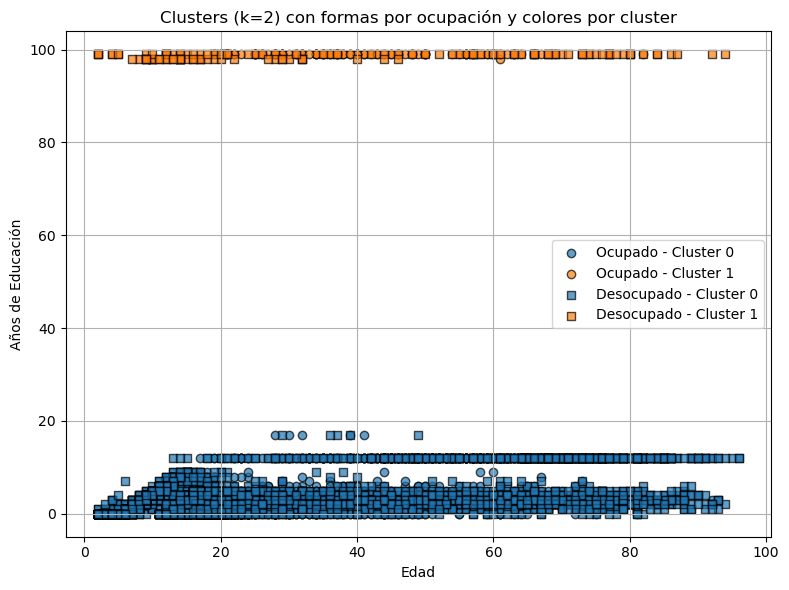

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Creamos la variable ocupacional simulada.
df['ocupacion'] = df['horastrab'].apply(lambda x: 'Ocupado' if x > 0 else 'Desocupado')

#Usamos edad y educ para el clustering y la gráfica.
cols = ['edad', 'educ', 'ocupacion']
df_cluster = df[cols].dropna()

#Estandarizamos edad y educ.
X = df_cluster[['edad', 'educ']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Aplicamos K-means con k=2.
kmeans = KMeans(n_clusters=2, n_init=20, random_state=42)
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

#Mapeo de formas por ocupación
markers = {'Ocupado': 'o', 'Desocupado': 's'}
colors = ['tab:blue', 'tab:orange']  # un color por cluster

#Graficamos.
plt.figure(figsize=(8, 6))

for ocupacion, marker in markers.items():
    for cluster_id in df_cluster['cluster'].unique():
        subset = df_cluster[(df_cluster['ocupacion'] == ocupacion) & (df_cluster['cluster'] == cluster_id)]
        plt.scatter(subset['edad'], subset['educ'],
                    color=colors[cluster_id],
                    marker=marker,
                    label=f'{ocupacion} - Cluster {cluster_id}',
                    alpha=0.7,
                    edgecolor='k')

plt.xlabel('Edad')
plt.ylabel('Años de Educación')
plt.title('Clusters (k=2) con formas por ocupación y colores por cluster')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 6. Cluster jerárquico:

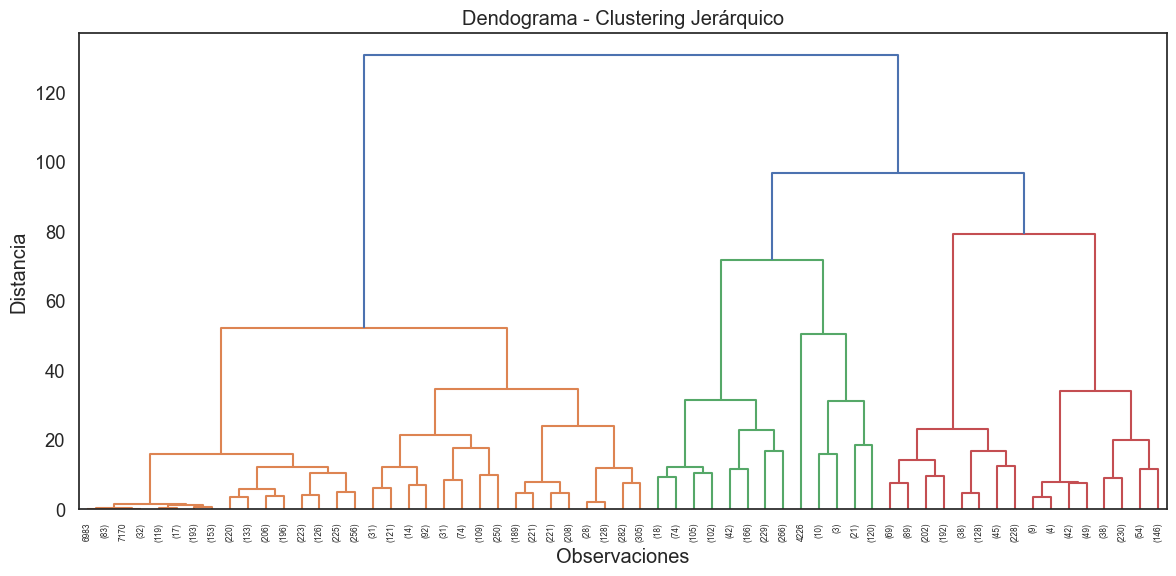

In [128]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

#Seleccionamos las variables.
features = ['edad', 'educ', 'salario_semanal', 'horastrab']
df_hier = df[features].dropna()

#Estandarizamos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_hier)

#Clustering jerárquico (usando el método de enlace ward).
Z = linkage(X_scaled, method='ward')

#Generamos el dendograma.
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='level', p=5)  # p=5 muestra solo los últimos niveles
plt.title('Dendograma - Clustering Jerárquico')
plt.xlabel('Observaciones')
plt.ylabel('Distancia')
plt.tight_layout()
plt.show()